In [1]:
import pandas as pd
import glob
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def extract_iters (ep):
    file_pattern = f'Results/EP{ep}/EP{ep}_Ideal_points_emIRT_Iteration*.csv'
    
    # Use glob to list all files matching the pattern
    file_list = glob.glob(file_pattern)
    
    # Initialize an empty list to hold the DataFrames
    df_list = []
    
    for file in file_list:
        df = pd.read_csv(file)
        column = df[f'EPG....EPG{ep}']
        names = df[f'MepId....names{ep}']
        df = df['d1']
        
        df_list.append(df)
    
    combined_df = pd.concat(df_list, axis=0)
    
    # Calculate the average across the DataFrames
    average_df = combined_df.groupby(combined_df.index).mean()
    column = column.reset_index(drop=True)
    names = names.reset_index(drop=True)
    average_df = average_df.reset_index(drop=True)
    
    final_df = pd.concat([names, column, average_df], axis=1)
    
    final_df.columns = ['MepId','EPG', 'Average_position']
    return final_df

In [3]:



avg6 = extract_iters(6)

In [4]:
avg6

,MepId,EPG,Average_position
0,28469,GUE–NGL,7.789021
1,28302,IND/DEM,0.351206
2,28975,GUE–NGL,8.936521
3,28367,EPP-ED,-3.838777
4,28512,NI,-1.596996
...,...,...,...
935,95280,PES,2.084978
936,95281,PES,2.363334
937,95704,EPP-ED,-3.078250
938,96101,EPP-ED,-1.828385


In [5]:
avg7 = extract_iters(7)
avg8 = extract_iters(8)
avg9 = extract_iters(9)

In [6]:
mepinfo6 = pd.read_csv(os.path.join('Cleaned_data','EP6_clean_data','mep_info_EP_6.csv'))
mepinfo7 = pd.read_csv(os.path.join('Cleaned_data','EP7_clean_data','mep_info_EP_7.csv'))
mepinfo8 = pd.read_csv(os.path.join('Cleaned_data','EP8_clean_data','mep_info_EP_8.csv'))

In [7]:
mepinfo7

,MepId,Fname,Lname,FullName,Activ,Country,Party,EPG,Start,End,Birthday,Gender
0,96850,Damien,Abad,Damien ABAD,no,France,Nouveau Centre,EPP,2009-07-14,2012-06-16,1980-04-05,MALE
1,96659,János,Áder,János ÁDER,no,Hungary,Fidesz-Magyar Polgári Szövetség-Keresztény Dem...,EPP,2009-07-14,2012-05-09,1959-05-09,MALE
2,96897,John Stuart,Agnew,John Stuart AGNEW,yes,United Kingdom,United Kingdom Independence Party,EFD,2009-07-14,2014-12-31,1949-08-30,MALE
3,28367,Gabriele,Albertini,Gabriele ALBERTINI,no,Italy,Il Popolo della Libertà,EPP,2009-07-14,2013-03-14,1950-07-06,MALE
4,96736,Jan Philipp,Albrecht,Jan Philipp ALBRECHT,yes,Germany,Bündnis 90/Die Grünen,Greens–EFA,2009-07-14,2014-12-31,1982-12-20,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...
848,122885,Rina Ronja,Kari,Rina Ronja KARI,no,Denmark,Folkebevægelsen mod EU,GUE–NGL,2014-02-05,2014-12-31,1985-02-15,FEMALE
849,123792,Giovanni,Barbagallo,Giovanni BARBAGALLO,no,Italy,Partito Democratico,S&D,2014-03-11,2014-12-31,1952-06-01,MALE
850,123816,Annette,Koewius,Annette KOEWIUS,no,Germany,Christlich Demokratische Union Deutschlands,EPP,2014-03-12,2014-12-31,1945-09-22,FEMALE
851,37200,Katrin,Saks,Katrin SAKS,no,Estonia,Sotsiaaldemokraatlik Erakond,S&D,2014-04-07,2014-12-31,1956-11-29,FEMALE


In [8]:
avg7 = avg7.rename(columns={'MepId':'FullName'})
avg8 = avg8.rename(columns={'MepId':'FullName'})


In [9]:
avg7 = pd.merge(avg7, mepinfo7, on='FullName', how='left')
avg8 = pd.merge(avg8, mepinfo8, on='FullName', how='left')

In [10]:
avg8

,FullName,EPG_x,Average_position,MepId,Fname,Lname,Activ,Country,Party,EPG_y,Start,End,Birthday,Gender
0,Lars ADAKTUSSON,NaN,2.445893,124990,Lars,Adaktusson,no,Sweden,Kristdemokraterna,NaN,2014-07-01,2018-09-23,1955-08-06,MALE
1,Isabella ADINOLFI,EFDD,-4.094120,124831,Isabella,Adinolfi,yes,Italy,Movimento 5 Stelle,EFDD,2014-07-01,2019-12-31,1978-03-27,FEMALE
2,Marco AFFRONTE,Greens–EFA,-4.801999,124797,Marco,Affronte,yes,Italy,Independent,Greens–EFA,2014-07-01,2019-12-31,1965-05-06,MALE
3,Laura AGEA,EFDD,-4.140657,124811,Laura,Agea,yes,Italy,Movimento 5 Stelle,EFDD,2014-07-01,2019-12-31,1978-02-17,FEMALE
4,John Stuart AGNEW,EFDD,0.855238,96897,John Stuart,Agnew,yes,United Kingdom,United Kingdom Independence Party,EFDD,2014-07-01,2019-12-31,1949-08-30,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,Aleksejs LOSKUTOVS,NaN,3.145643,196042,Aleksejs,Loskutovs,yes,Latvia,NaN,NaN,2019-01-24,2019-12-31,1962-08-22,MALE
854,Ralph PACKET,NaN,1.244146,195454,Ralph,Packet,yes,Belgium,NaN,NaN,2018-11-22,2019-12-31,1990-07-17,MALE
855,Kārlis ŠADURSKIS,NaN,3.867057,111033,Kārlis,Šadurskis,yes,Latvia,NaN,NaN,2018-11-28,2019-12-31,1959-10-11,MALE
856,Bogusław SONIK,NaN,4.034291,28299,Bogusław,Sonik,yes,Poland,NaN,NaN,2018-11-20,2019-12-31,1953-12-03,MALE


In [11]:
def load_vote_data(ep):
    df = pd.read_csv(os.path.join('Results', f'votes_plotly_{ep}.csv'))
    epg_counts = df['MepId'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['MepId'].value_counts()
    dataframe = pd.DataFrame()
    dataframe['MepId'] = df['MepId'].unique()
    proportions = epg_4_votes / epg_counts
    dataframe['Proportion'] = proportions
    return proportions.reset_index()

In [12]:
proportions6 = load_vote_data(6)
proportions7 = load_vote_data(7)
proportions8 = load_vote_data(8)
proportions9 = load_vote_data(9)

In [13]:
proportions6

,MepId,count
0,1,0.225198
1,234,0.007098
2,684,0.151960
3,729,0.026456
4,945,0.168576
...,...,...
935,95280,0.033231
936,95281,0.028714
937,95298,0.071302
938,95704,0.020003


In [14]:
final6 = pd.merge(proportions6, avg6, on='MepId', how='left')
final7 = pd.merge(proportions7, avg7, on='MepId', how='left')
final8 = pd.merge(proportions8, avg8, on='MepId', how='left')
final9 = pd.merge(proportions9, avg9, on='MepId', how='left')

In [15]:
final6


,MepId,count,EPG,Average_position
0,1,0.225198,EPP-ED,-5.521790
1,234,0.007098,GUE–NGL,1.782747
2,684,0.151960,EPP-ED,-3.907710
3,729,0.026456,EPP-ED,-3.269855
4,945,0.168576,EPP-ED,-3.209652
...,...,...,...,...
935,95280,0.033231,PES,2.084978
936,95281,0.028714,PES,2.363334
937,95298,0.071302,PES,2.219980
938,95704,0.020003,EPP-ED,-3.078250


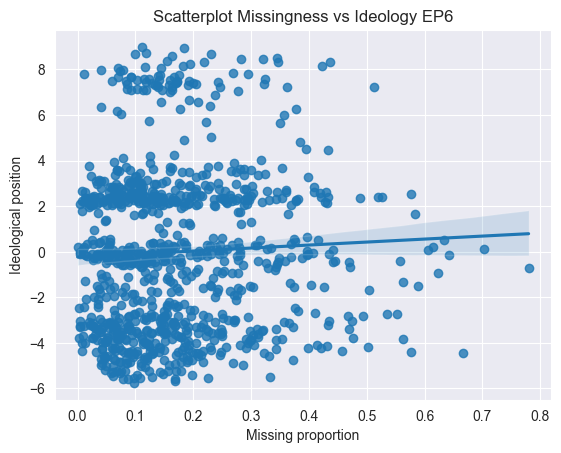

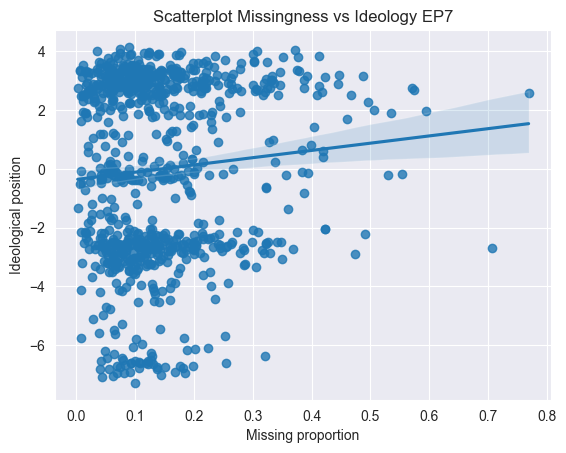

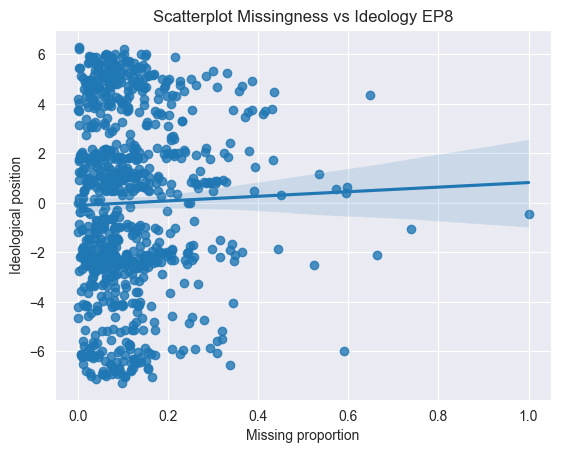

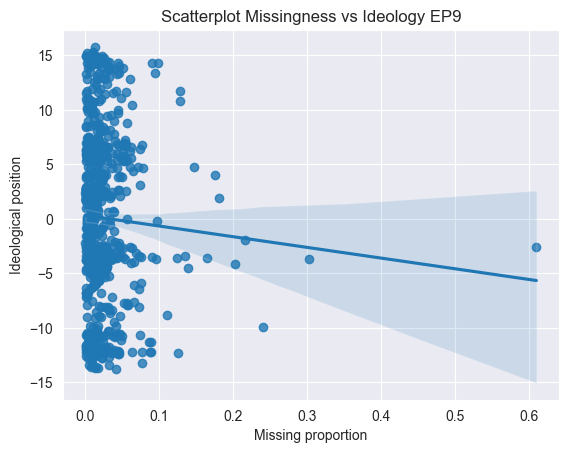

In [16]:
corr6 = final6['count'].corr(final6['Average_position'])
# Create a scatter plot with a regression line
sns.regplot(x="count", y="Average_position", data=final6)

# Add labels and title
plt.xlabel("Missing proportion")
plt.ylabel("Ideological position")
plt.title("Scatterplot Missingness vs Ideology EP6")


# Show plot
plt.show()
corr7 = final7['count'].corr(final7['Average_position'])
sns.regplot(x="count", y="Average_position", data=final7)

# Add labels and title
plt.xlabel("Missing proportion")
plt.ylabel("Ideological position")
plt.title("Scatterplot Missingness vs Ideology EP7")

# Show plot
plt.show()
corr8 = final8['count'].corr(final8['Average_position'])
sns.regplot(x="count", y="Average_position", data=final8)

# Add labels and title
plt.xlabel("Missing proportion")
plt.ylabel("Ideological position")
plt.title("Scatterplot Missingness vs Ideology EP8")

# Show plot
plt.show()
corr9 = final9['count'].corr(final9['Average_position'])
sns.regplot(x="count", y="Average_position", data=final9)

# Add labels and title
plt.xlabel("Missing proportion")
plt.ylabel("Ideological position")
plt.title("Scatterplot Missingness vs Ideology EP9")

# Show plot
plt.show()

In [17]:
corr6

np.float64(0.0465415261294359)

In [18]:
corr7

np.float64(0.08457863779846964)

In [19]:
corr8

np.float64(0.026895468378809295)

In [20]:
corr9


np.float64(-0.04543762216219708)

In [21]:
def recodeEMIRT(vote):
    if vote == 1:
        return 1
    if vote == 2:
        return -1
    return 0

In [22]:
def recodeWNOM(vote):
    if vote == 0:
        return 9
    if vote == 1:
        return 1
    if vote == 2:
        return 6
    return 9

In [23]:
matrix6 = pd.read_csv(os.path.join('Cleaned_data','EP6_clean_data','wnominate_ep6_votes.csv'))
matrix7 = pd.read_csv(os.path.join('Cleaned_data','EP7_clean_data','matrix_ep7_votes.csv'))
matrix8 = pd.read_csv(os.path.join('Cleaned_data','EP8_clean_data','matrix_ep8_votes.csv'))
matrix9 = pd.read_csv(os.path.join('Cleaned_data','EP9_clean_data','matrix_ep9_votes.csv'))


In [24]:
matrix6.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '6191', '6192', '6193', '6194', '6195', '6196', '6197', '6198', '6199',
       '6200'],
      dtype='object', length=6199)

In [25]:
matrix7.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '6954', '6955', '6956', '6957', '6958', '6959', '6960', '6961', '6962',
       '6963'],
      dtype='object', length=6961)

In [26]:
matrix8.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '10267', '10268', '10269', '10270', '10271', '10272', '10273', '10274',
       '10275', '10276'],
      dtype='object', length=10252)

In [27]:
matrix9.columns

Index(['MepId', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '18665', '18666', '18667', '18668', '18669', '18670', '18671', '18672',
       '18673', '18674'],
      dtype='object', length=18675)

In [28]:
matrix6.insert(0,'MepId',mepinfo6.MepId)
matrix7.insert(0,'MepId',mepinfo7.MepId)
matrix8.insert(0,'MepId',mepinfo8.MepId)

In [29]:
matrix6.columns

Index(['MepId', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '6191', '6192', '6193', '6194', '6195', '6196', '6197', '6198', '6199',
       '6200'],
      dtype='object', length=6200)

In [30]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Text(0, 0.5, 'emIRT recoded PCA')

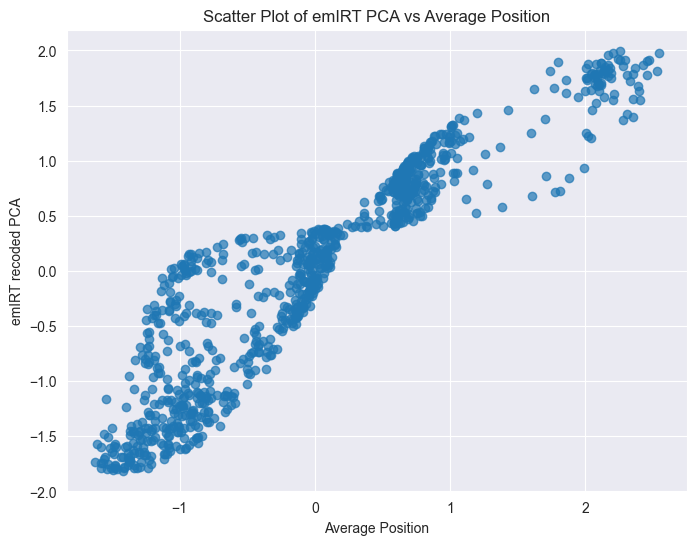

In [31]:
matrix6EMIRT = matrix6.copy()
matrix6WNOMINATE = matrix6.copy()
matrix6EMIRT[matrix6EMIRT.columns[1:]] =  matrix6EMIRT[matrix6EMIRT.columns[1:]].map(recodeEMIRT)
matrix6WNOMINATE[matrix6WNOMINATE.columns[1:]] =  matrix6WNOMINATE[matrix6WNOMINATE.columns[1:]].map(recodeWNOM)
pca = PCA(n_components=1)
scaler = StandardScaler()
basepca6 = pca.fit_transform(matrix6[matrix6.columns[1:]])
emIRTpca6 = pca.fit_transform(matrix6EMIRT[matrix6EMIRT.columns[1:]])
WNOMINATEpca6 = pca.fit_transform(matrix6WNOMINATE[matrix6WNOMINATE.columns[1:]])
basepca6std = scaler.fit_transform(basepca6)
emIRTpca6std = scaler.fit_transform(emIRTpca6)
WNOMINATEpca6std = scaler.fit_transform(WNOMINATEpca6)
avg6std = avg6.copy()
avg6std['Average_position'] = scaler.fit_transform(avg6std['Average_position'].values.reshape(-1, 1))
full6 = pd.concat([avg6std,pd.Series(basepca6std.ravel()),pd.Series(emIRTpca6std.ravel()),pd.Series(WNOMINATEpca6std.ravel())],axis=1)
plt.figure(figsize=(8, 6))
plt.scatter(full6['Average_position'], full6[1], alpha=0.7)

# Add labels and title
plt.title(f'Scatter Plot of emIRT PCA vs Average Position')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')

In [32]:
basepca6std

array([[ 8.88477344e-01],
       [-2.16781655e+00],
       [ 4.34387877e-01],
       [ 3.66475635e-01],
       [ 1.15465058e+00],
       [ 3.19332192e-01],
       [ 2.89172284e-01],
       [ 2.62854448e-01],
       [-2.11574515e-01],
       [ 4.76266606e-01],
       [ 8.49502054e-01],
       [ 1.50685068e+00],
       [ 4.47544226e-01],
       [ 3.83375157e-01],
       [ 6.50643287e-01],
       [ 1.07873524e+00],
       [ 8.29183498e-01],
       [ 6.39660164e-01],
       [ 3.67251315e-01],
       [ 2.11594935e-01],
       [ 2.78240205e-01],
       [ 3.19538226e-01],
       [ 4.08480172e-01],
       [ 5.39646819e-01],
       [-1.08392504e+00],
       [ 1.74745920e+00],
       [ 4.06518363e-01],
       [ 8.86570634e-01],
       [ 4.40251902e-01],
       [ 1.46887336e+00],
       [ 2.78243457e-01],
       [ 7.04309567e-01],
       [ 1.31014669e-01],
       [ 3.26906498e-01],
       [ 5.44679107e-01],
       [ 1.59742237e-01],
       [ 8.40280252e-01],
       [-8.52553063e-01],
       [ 3.3

In [33]:
emIRTpca6std

array([[ 1.54786901],
       [ 0.35045213],
       [ 1.81342718],
       [-1.49794373],
       [-0.55348042],
       [-0.41446644],
       [ 1.07758901],
       [-0.33070422],
       [ 0.10377991],
       [-1.45245464],
       [-0.67835699],
       [-0.62825395],
       [ 1.24929837],
       [ 1.0223919 ],
       [-1.21773461],
       [ 0.71756233],
       [-1.10376623],
       [ 0.88279838],
       [ 0.04252747],
       [ 1.79897801],
       [ 1.73103609],
       [ 0.9118292 ],
       [-0.70781718],
       [-1.4272687 ],
       [-0.40086858],
       [ 0.10275603],
       [ 0.82859955],
       [ 0.73707208],
       [-1.41380639],
       [-0.02113134],
       [ 0.68146218],
       [ 0.96313531],
       [-1.51749468],
       [-0.05991984],
       [-1.36041421],
       [-1.60292498],
       [ 1.45834612],
       [ 0.73491017],
       [-0.43541454],
       [-1.1305849 ],
       [-0.06051399],
       [ 1.70906773],
       [ 0.69421652],
       [-1.73288993],
       [ 1.21762294],
       [ 0

In [34]:
WNOMINATEpca6std

array([[-0.07310544],
       [ 2.03372534],
       [-0.58950923],
       [-0.86304315],
       [ 0.60140088],
       [-0.88511438],
       [-1.00439893],
       [-1.02185199],
       [ 0.39223808],
       [-0.66123461],
       [-0.18602075],
       [ 0.75293264],
       [-0.68150425],
       [-0.78467559],
       [-0.33539903],
       [ 0.08301606],
       [-0.1369137 ],
       [-0.46891036],
       [-0.88803119],
       [-0.96237196],
       [-0.8509861 ],
       [-0.86744744],
       [-0.78554805],
       [-0.63728533],
       [ 0.93320941],
       [ 0.90011132],
       [-0.87421056],
       [-0.31099497],
       [-0.77841772],
       [ 1.06459592],
       [-1.05680876],
       [-0.44974425],
       [-1.12932144],
       [-0.93806263],
       [-0.51519989],
       [-1.12161543],
       [-0.13250659],
       [ 0.79675663],
       [-0.69582991],
       [-0.68370074],
       [-0.56954814],
       [-0.86923366],
       [ 0.1564526 ],
       [-1.0145625 ],
       [-0.79715455],
       [ 0

In [35]:
emIRTpca6std

array([[ 1.54786901],
       [ 0.35045213],
       [ 1.81342718],
       [-1.49794373],
       [-0.55348042],
       [-0.41446644],
       [ 1.07758901],
       [-0.33070422],
       [ 0.10377991],
       [-1.45245464],
       [-0.67835699],
       [-0.62825395],
       [ 1.24929837],
       [ 1.0223919 ],
       [-1.21773461],
       [ 0.71756233],
       [-1.10376623],
       [ 0.88279838],
       [ 0.04252747],
       [ 1.79897801],
       [ 1.73103609],
       [ 0.9118292 ],
       [-0.70781718],
       [-1.4272687 ],
       [-0.40086858],
       [ 0.10275603],
       [ 0.82859955],
       [ 0.73707208],
       [-1.41380639],
       [-0.02113134],
       [ 0.68146218],
       [ 0.96313531],
       [-1.51749468],
       [-0.05991984],
       [-1.36041421],
       [-1.60292498],
       [ 1.45834612],
       [ 0.73491017],
       [-0.43541454],
       [-1.1305849 ],
       [-0.06051399],
       [ 1.70906773],
       [ 0.69421652],
       [-1.73288993],
       [ 1.21762294],
       [ 0

In [36]:
avg6std = avg6.copy()
avg6std['Average_position'] = scaler.fit_transform(avg6std['Average_position'].values.reshape(-1, 1))

In [37]:
avg6std

,MepId,EPG,Average_position
0,28469,GUE–NGL,2.202204
1,28302,IND/DEM,0.100721
2,28975,GUE–NGL,2.526419
3,28367,EPP-ED,-1.083118
4,28512,NI,-0.449724
...,...,...,...
935,95280,PES,0.590582
936,95281,PES,0.669229
937,95704,EPP-ED,-0.868238
938,96101,EPP-ED,-0.515101


In [38]:
full6 = pd.concat([avg6std,pd.Series(basepca6std.ravel()),pd.Series(emIRTpca6std.ravel()),pd.Series(WNOMINATEpca6std.ravel())],axis=1)

In [39]:
full6

,MepId,EPG,Average_position,0,1,2
0,28469,GUE–NGL,2.202204,0.888477,1.547869,-0.073105
1,28302,IND/DEM,0.100721,-2.167817,0.350452,2.033725
2,28975,GUE–NGL,2.526419,0.434388,1.813427,-0.589509
3,28367,EPP-ED,-1.083118,0.366476,-1.497944,-0.863043
4,28512,NI,-0.449724,1.154651,-0.553480,0.601401
...,...,...,...,...,...,...
935,95280,PES,0.590582,-2.239100,0.448381,1.798827
936,95281,PES,0.669229,-2.257689,0.488087,1.794710
937,95704,EPP-ED,-0.868238,-2.263263,0.112827,1.882225
938,96101,EPP-ED,-0.515101,-2.353821,0.298438,2.120886


Text(0, 0.5, 'emIRT recoded PCA')

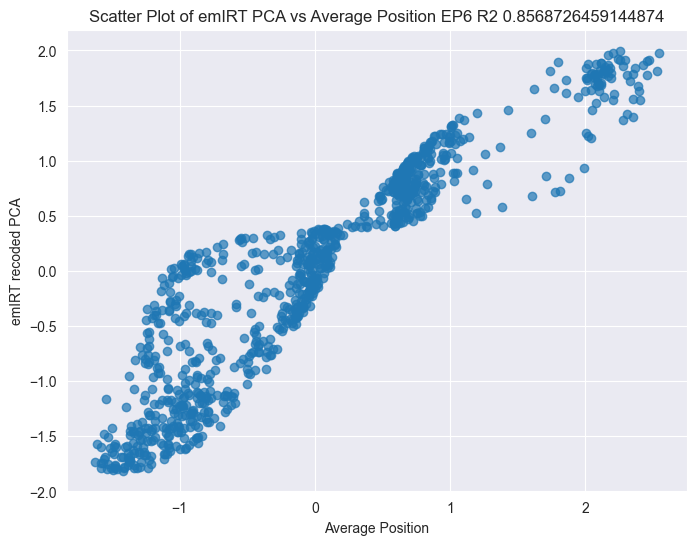

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(full6['Average_position'], full6[1], alpha=0.7)
correlation6 = full6['Average_position'].corr(full6[1])

r_squared6 = correlation6 ** 2
# Add labels and title
plt.title(f'Scatter Plot of emIRT PCA vs Average Position EP6 R2 {r_squared6}')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')

In [41]:
from sklearn.metrics import mean_squared_error
correlation6 = full6['Average_position'].corr(full6[1])
mse6 = mean_squared_error(full6['Average_position'], full6[1])
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression().fit(full6[['Average_position']], full6[1])

In [43]:
r_squared = model.score(full6[['Average_position']], full6[1])

In [44]:
r_squared

0.8568726459144864

In [45]:
emIRTpca6 = pca.fit_transform(matrix6EMIRT[matrix6EMIRT.columns[1:]])


In [46]:
pca.explained_variance_ratio_[0]

np.float64(0.21419702296297038)

0.8803193834327981 -0.9382533684633368


Text(0, 0.5, 'emIRT recoded PCA')

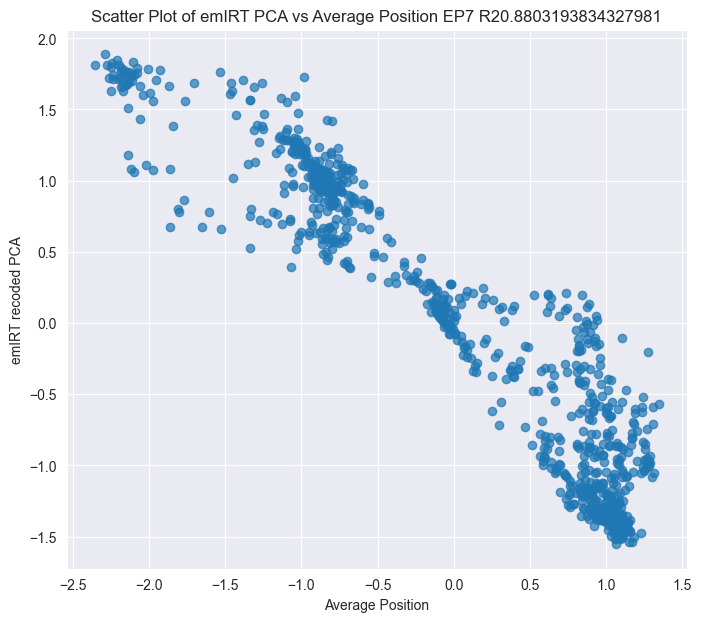

In [47]:
matrix7EMIRT = matrix7.copy()
pca = PCA(n_components=1)
scaler = StandardScaler()
matrix7EMIRT[matrix7EMIRT.columns[1:]] =  matrix7EMIRT[matrix7EMIRT.columns[1:]].map(recodeEMIRT)

emIRTpca7 = pca.fit_transform(matrix7EMIRT[matrix7EMIRT.columns[1:]])
emIRTpca7std = scaler.fit_transform(emIRTpca7)
avg7std = avg7.copy()
avg7std['Average_position'] = scaler.fit_transform(avg7std['Average_position'].values.reshape(-1, 1))
full7 = pd.concat([avg7std,pd.Series(emIRTpca7std.ravel())],axis=1)
plt.figure(figsize=(8, 7))
plt.scatter(full7['Average_position'], full7[0], alpha=0.7)
correlation7 = full7['Average_position'].corr(full7[0])

r_squared7 = correlation7 ** 2
print(r_squared7, correlation7)
# Add labels and title
plt.title(f'Scatter Plot of emIRT PCA vs Average Position EP7 R2{r_squared7}')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')



In [48]:
matrix7['1']

0      2
1      2
2      5
3      2
4      5
      ..
848    0
849    0
850    0
851    0
852    0
Name: 1, Length: 853, dtype: int64

0.5531967277827998 -0.7437719595298009


Text(0, 0.5, 'emIRT recoded PCA')

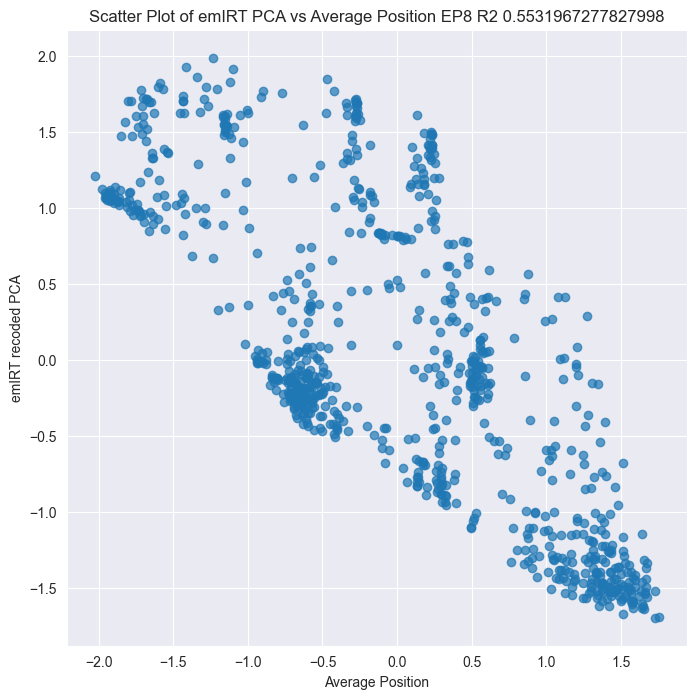

In [49]:
matrix8EMIRT = matrix8.copy()
pca = PCA(n_components=1)
scaler = StandardScaler()
matrix8EMIRT[matrix8EMIRT.columns[1:]] =  matrix8EMIRT[matrix8EMIRT.columns[1:]].map(recodeEMIRT)

emIRTpca8 = pca.fit_transform(matrix8EMIRT[matrix8EMIRT.columns[1:]])
emIRTpca8std = scaler.fit_transform(emIRTpca8)
avg8std = avg8.copy()
avg8std['Average_position'] = scaler.fit_transform(avg8std['Average_position'].values.reshape(-1, 1))
full8 = pd.concat([avg8std,pd.Series(emIRTpca8std.ravel())],axis=1)
plt.figure(figsize=(8, 8))
plt.scatter(full8['Average_position'], full8[0], alpha=0.7)
correlation8 = full8['Average_position'].corr(full8[0])

r_squared8 = correlation8 ** 2
print(r_squared8, correlation8)
# Add labels and title
plt.title(f'Scatter Plot of emIRT PCA vs Average Position EP8 R2 {r_squared8}')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')



0.854993182049695 0.9246584137127045


Text(0, 0.5, 'emIRT recoded PCA')

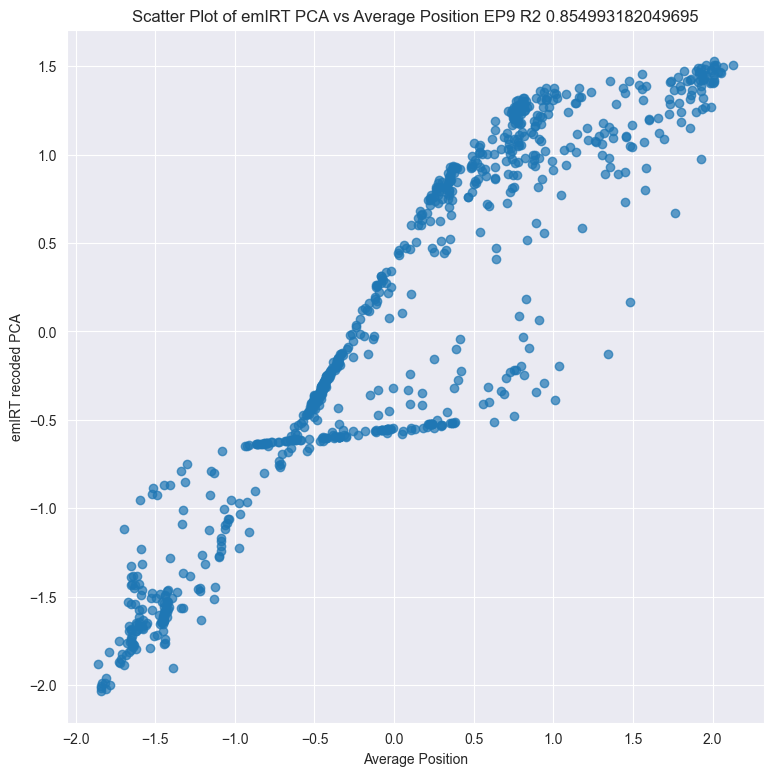

In [50]:
matrix9EMIRT = matrix9.copy()
pca = PCA(n_components=1)
scaler = StandardScaler()
matrix9EMIRT[matrix9EMIRT.columns[1:]] =  matrix9EMIRT[matrix9EMIRT.columns[1:]].map(recodeEMIRT)

emIRTpca9 = pca.fit_transform(matrix9EMIRT[matrix9EMIRT.columns[1:]])
emIRTpca9std = scaler.fit_transform(emIRTpca9)
avg9std = avg9.copy()
avg9std['Average_position'] = scaler.fit_transform(avg9std['Average_position'].values.reshape(-1, 1))
full9 = pd.concat([avg9std,pd.Series(emIRTpca9std.ravel())],axis=1)
plt.figure(figsize=(9, 9))
plt.scatter(full9['Average_position'], full9[0], alpha=0.7)
correlation9 = full9['Average_position'].corr(full9[0])

r_squared9 = correlation9 ** 2
print(r_squared9, correlation9)
# Add labels and title
plt.title(f'Scatter Plot of emIRT PCA vs Average Position EP9 R2 {r_squared9}')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')



In [51]:
full7

,FullName,EPG_x,Average_position,MepId,Fname,Lname,Activ,Country,Party,EPG_y,Start,End,Birthday,Gender,0
0,Damien ABAD,EPP,0.732721,96850,Damien,Abad,no,France,Nouveau Centre,EPP,2009-07-14,2012-06-16,1980-04-05,MALE,-0.289216
1,János ÁDER,EPP,0.860911,96659,János,Áder,no,Hungary,Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt,EPP,2009-07-14,2012-05-09,1959-05-09,MALE,-0.406652
2,John Stuart AGNEW,EFD,0.953868,96897,John Stuart,Agnew,yes,United Kingdom,United Kingdom Independence Party,EFD,2009-07-14,2014-12-31,1949-08-30,MALE,-0.143959
3,Gabriele ALBERTINI,EPP,1.001823,28367,Gabriele,Albertini,no,Italy,Il Popolo della Libertà,EPP,2009-07-14,2013-03-14,1950-07-06,MALE,-0.596398
4,Jan Philipp ALBRECHT,Greens–EFA,-2.122607,96736,Jan Philipp,Albrecht,yes,Germany,Bündnis 90/Die Grünen,Greens–EFA,2009-07-14,2014-12-31,1982-12-20,MALE,1.735090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Rina Ronja KARI,GUE–NGL,-1.032554,122885,Rina Ronja,Kari,no,Denmark,Folkebevægelsen mod EU,GUE–NGL,2014-02-05,2014-12-31,1985-02-15,FEMALE,0.523180
849,Giovanni BARBAGALLO,S&D,-0.543772,123792,Giovanni,Barbagallo,no,Italy,Partito Democratico,S&D,2014-03-11,2014-12-31,1952-06-01,MALE,0.320987
850,Annette KOEWIUS,EPP,0.634082,123816,Annette,Koewius,no,Germany,Christlich Demokratische Union Deutschlands,EPP,2014-03-12,2014-12-31,1945-09-22,FEMALE,0.116575
851,Katrin SAKS,S&D,-0.428299,37200,Katrin,Saks,no,Estonia,Sotsiaaldemokraatlik Erakond,S&D,2014-04-07,2014-12-31,1956-11-29,FEMALE,0.285241


In [52]:
eigenstarts7 = pd.read_csv(os.path.join('Results','EP7','emIRT_EP7_eigenstarts.csv'))

In [53]:
eigenstarts7

,MepId....names7,EPG....EPG7,d1,y
0,Damien ABAD,EPP,0.065917,0
1,János ÁDER,EPP,0.078064,0
2,John Stuart AGNEW,EFD,0.262885,0
3,Gabriele ALBERTINI,EPP,0.081228,0
4,Jan Philipp ALBRECHT,Greens–EFA,-0.324134,0
...,...,...,...,...
848,Rina Ronja KARI,GUE–NGL,-0.061410,0
849,Giovanni BARBAGALLO,S&D,-0.072549,0
850,Annette KOEWIUS,EPP,0.071819,0
851,Katrin SAKS,S&D,-0.058129,0


In [54]:
avg7

,FullName,EPG_x,Average_position,MepId,Fname,Lname,Activ,Country,Party,EPG_y,Start,End,Birthday,Gender
0,Damien ABAD,EPP,2.253332,96850,Damien,Abad,no,France,Nouveau Centre,EPP,2009-07-14,2012-06-16,1980-04-05,MALE
1,János ÁDER,EPP,2.649164,96659,János,Áder,no,Hungary,Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt,EPP,2009-07-14,2012-05-09,1959-05-09,MALE
2,John Stuart AGNEW,EFD,2.936203,96897,John Stuart,Agnew,yes,United Kingdom,United Kingdom Independence Party,EFD,2009-07-14,2014-12-31,1949-08-30,MALE
3,Gabriele ALBERTINI,EPP,3.084280,28367,Gabriele,Albertini,no,Italy,Il Popolo della Libertà,EPP,2009-07-14,2013-03-14,1950-07-06,MALE
4,Jan Philipp ALBRECHT,Greens–EFA,-6.563521,96736,Jan Philipp,Albrecht,yes,Germany,Bündnis 90/Die Grünen,Greens–EFA,2009-07-14,2014-12-31,1982-12-20,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Rina Ronja KARI,GUE–NGL,-3.197591,122885,Rina Ronja,Kari,no,Denmark,Folkebevægelsen mod EU,GUE–NGL,2014-02-05,2014-12-31,1985-02-15,FEMALE
849,Giovanni BARBAGALLO,S&D,-1.688300,123792,Giovanni,Barbagallo,no,Italy,Partito Democratico,S&D,2014-03-11,2014-12-31,1952-06-01,MALE
850,Annette KOEWIUS,EPP,1.948749,123816,Annette,Koewius,no,Germany,Christlich Demokratische Union Deutschlands,EPP,2014-03-12,2014-12-31,1945-09-22,FEMALE
851,Katrin SAKS,S&D,-1.331737,37200,Katrin,Saks,no,Estonia,Sotsiaaldemokraatlik Erakond,S&D,2014-04-07,2014-12-31,1956-11-29,FEMALE


Text(0, 0.5, 'emIRT recoded PCA')

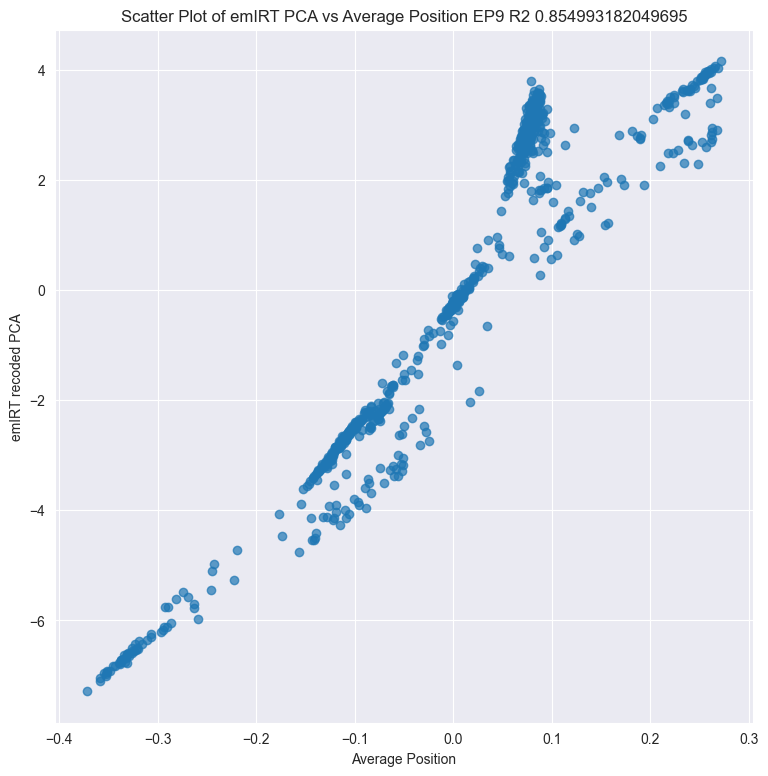

In [55]:
plt.figure(figsize=(9, 9))
plt.scatter(eigenstarts7['d1'], avg7['Average_position'], alpha=0.7)
plt.title(f'Scatter Plot of emIRT PCA vs Average Position EP9 R2 {r_squared9}')
plt.xlabel('Average Position')
plt.ylabel('emIRT recoded PCA')

In [56]:
wnom2d6 = pd.read_csv(os.path.join('Results','EP6_2D_Ideal_points_WNOMINATE_with_mep_id.csv'))

In [57]:
matrix6WNOMINATE = matrix6.copy()
pca1d = PCA(n_components=1)
matrix6WNOMINATE[matrix6WNOMINATE.columns[1:]] =  matrix6WNOMINATE[matrix6WNOMINATE.columns[1:]].map(recodeWNOM)
pca = PCA(n_components=2)
scaler = StandardScaler()
WNOMINATEpca62d = pca.fit_transform(matrix6WNOMINATE[matrix6WNOMINATE.columns[1:]])

WNOMINATEpca62dEMscaling = pca.fit_transform(matrix6EMIRT[matrix6EMIRT.columns[1:]])
data_centered = WNOMINATEpca62dEMscaling - np.mean(WNOMINATEpca62dEMscaling, axis=0)

# Step 2: Scale to unit hypersphere (normalize)
norms = np.linalg.norm(data_centered, axis=1, keepdims=True)
data_normalized = data_centered / norms
WNOMINATEpca62dstd = data_normalized

In [58]:
wnom2d6

,MepId....mepsEP6.MepId,EPG....mepsEP6.EPG,correctYea....result.legislators.correctYea,wrongYea....result.legislators.wrongNay,correctNay....result.legislators.correctNay,wrongNay....result.legislators.wrongNay,GMP....result.legislators.GMP,CC....result.legislators.CC,coord1D....result.legislators.coord1D,coord2D....result.legislators.coord2D
0,28469,GUE–NGL,2167.0,138.0,1022.0,138.0,0.767301,0.884605,0.278548,0.960422
1,28302,IND/DEM,139.0,95.0,185.0,95.0,0.558100,0.646707,-0.084435,0.996429
2,28975,GUE–NGL,2700.0,200.0,1252.0,200.0,0.813023,0.914603,0.274476,0.961594
3,28367,EPP-ED,2542.0,143.0,2151.0,143.0,0.831433,0.950770,-0.149171,-0.342261
4,28512,NI,737.0,513.0,2011.0,513.0,0.593392,0.732409,-0.879420,0.476046
...,...,...,...,...,...,...,...,...,...,...
935,95280,PES,457.0,11.0,184.0,11.0,0.879951,0.972686,0.076032,-0.997105
936,95281,PES,465.0,6.0,196.0,6.0,0.920004,0.988042,0.079082,-0.996868
937,95704,EPP-ED,326.0,9.0,283.0,9.0,0.878379,0.977528,-0.165124,-0.462241
938,96101,EPP-ED,125.0,3.0,102.0,3.0,0.896097,0.986957,-0.157913,-0.237379


In [60]:
pca2ddf = pd.DataFrame(WNOMINATEpca62dstd)

In [68]:
mepinfo6

,MepId,Fname,Lname,FullName,Activ,Country,Party,EPG,Start,End,Birthday,Gender
0,28469,Adamos,Adamou,Adamos ADAMOU,yes,Cyprus,Anorthotiko Komma Ergazomenou Laou - Aristera - Nees Dynameis,GUE–NGL,2004-07-20,2009-12-31,1950-10-30,MALE
1,28302,Filip,Adwent,Filip ADWENT,no,Poland,Liga Polskich Rodzin,IND/DEM,2004-07-20,2005-06-26,1955-08-31,MALE
2,28975,Vittorio,AGNOLETTO,Vittorio AGNOLETTO,yes,Italy,Partito della Rifondazione Comunista - Sinistra Europea,GUE–NGL,2004-07-20,2009-12-31,1958-03-06,MALE
3,28367,Gabriele,Albertini,Gabriele ALBERTINI,yes,Italy,Forza Italia,EPP-ED,2004-07-20,2009-12-31,1950-07-06,MALE
4,28512,Jim,Allister,Jim ALLISTER,yes,United Kingdom,Traditional Unionist,NI,2004-07-20,2009-12-31,1953-04-02,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...
935,95280,Alin Lucian,Antochi,Alin Lucian ANTOCHI,yes,Romania,Partidul Social Democrat,PES,2009-01-21,2009-12-31,1972-12-10,MALE
936,95281,Viorica,Dăncilă,Viorica DĂNCILĂ,yes,Romania,Partidul Social Democrat,PES,2009-01-21,2009-12-31,1963-12-16,FEMALE
937,95704,Ioan Lucian,Hămbășan,Ioan Lucian HĂMBĂȘAN,yes,Romania,Partidul Democrat-Liberal,EPP-ED,2009-03-01,2009-12-31,1976-01-11,MALE
938,96101,Daniel,Bautista,Daniel BAUTISTA,yes,Spain,Partido Popular,EPP-ED,2009-03-26,2009-12-31,1974-03-03,MALE


In [69]:
pca2ddf['EPG'] = mepinfo6['EPG']

In [64]:
matrix6WNOMINATE['MepId']

0      28469
1      28302
2      28975
3      28367
4      28512
       ...  
935    95280
936    95281
937    95704
938    96101
939    23852
Name: MepId, Length: 940, dtype: int64

In [66]:
pca2ddf['MepId'] = matrix6WNOMINATE['MepId']

In [70]:
pca2ddf

,0,1,MepId,EPG
0,0.866875,-0.498525,28469,GUE–NGL
1,0.277535,-0.960716,28302,IND/DEM
2,0.940850,-0.338823,28975,GUE–NGL
3,-0.957088,0.289797,28367,EPP-ED
4,-0.295803,-0.955249,28512,NI
...,...,...,...,...
935,0.492535,-0.870292,95280,PES
936,0.527683,-0.849441,95281,PES
937,0.117690,-0.993050,95704,EPP-ED
938,0.272969,-0.962023,96101,EPP-ED


In [74]:
df2 = pd.DataFrame(WNOMINATEpca62dEMscaling)

In [75]:
df2['EPG'] = mepinfo6['EPG']

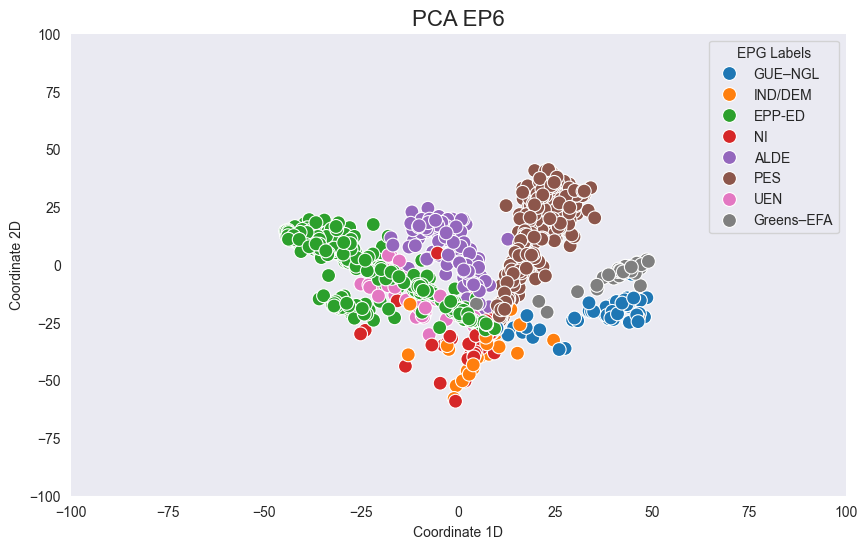

In [81]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=df2, x=0, y=1, hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.title(f'PCA EP6', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

# Show the plot
plt.show()

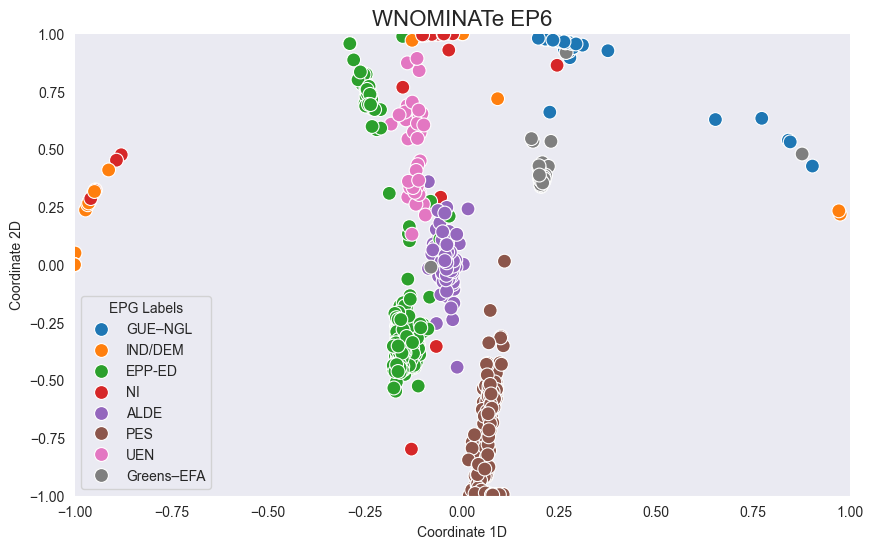

In [83]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=wnom2d6, x='coord1D....result.legislators.coord1D', y='coord2D....result.legislators.coord2D', hue='EPG....mepsEP6.EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'WNOMINATe EP6', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

# Show the plot
plt.show()

In [84]:
from scipy.spatial import procrustes

In [85]:
y = np.array(wnom2d6[['coord1D....result.legislators.coord1D','coord2D....result.legislators.coord2D']])

In [88]:
y

array([[ 0.27854812,  0.96042228],
       [-0.0844354 ,  0.99642891],
       [ 0.27447557,  0.9615941 ],
       ...,
       [-0.1651236 , -0.46224141],
       [-0.15791278, -0.23737876],
       [-0.17594315, -0.53361285]])

In [89]:
y = np.nan_to_num(y, nan=np.nanmean(y, axis=0))

In [100]:
mtx1, mtx2, disparity = procrustes(WNOMINATEpca62d, y)

In [101]:
dfmtx1 = pd.DataFrame(mtx1)
dfmtx2 = pd.DataFrame(mtx2)
dfmtx2['EPG'] = mepinfo6['EPG']
dfmtx1['EPG'] = mepinfo6['EPG']

In [102]:
disparity

np.float64(0.9883682512015175)

In [103]:
dfmtx1

,0,1,EPG
0,-0.002058,-0.004609,GUE–NGL
1,0.057256,-0.012201,IND/DEM
2,-0.016596,-0.003255,GUE–NGL
3,-0.024297,0.009603,EPP-ED
4,0.016931,-0.008322,NI
...,...,...,...
935,0.050643,0.014434,PES
936,0.050527,0.014818,PES
937,0.052990,0.011430,EPP-ED
938,0.059709,0.002457,EPP-ED


In [104]:
dfmtx2

,0,1,EPG
0,0.003153,-0.005784,GUE–NGL
1,0.004735,-0.004512,IND/DEM
2,0.003173,-0.005773,GUE–NGL
3,-0.000228,0.001057,EPP-ED
4,0.005863,0.000655,NI
...,...,...,...
935,-0.003676,0.002779,PES
936,-0.003687,0.002766,PES
937,-0.000632,0.001595,EPP-ED
938,0.000216,0.000674,EPP-ED


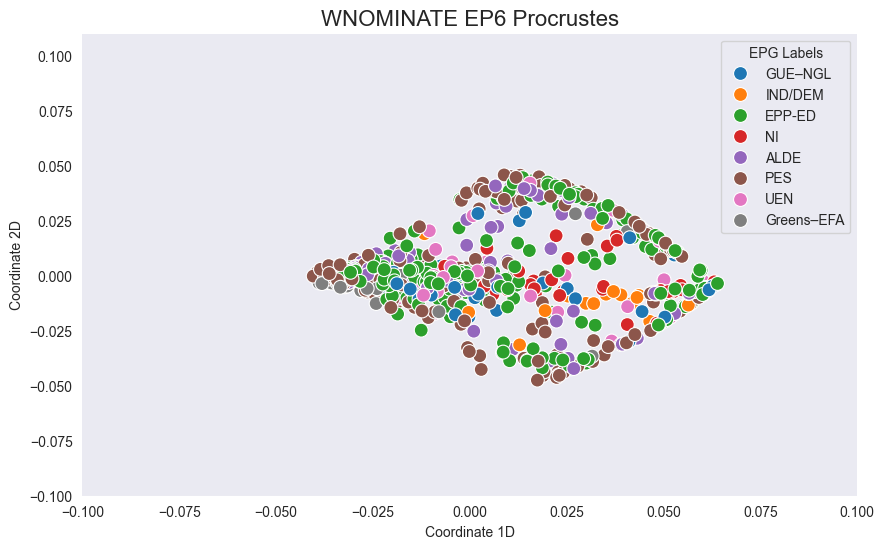

In [110]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=dfmtx1, x=0, y=1, hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.11)
plt.title(f'WNOMINATE EP6 Procrustes', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

# Show the plot
plt.show()

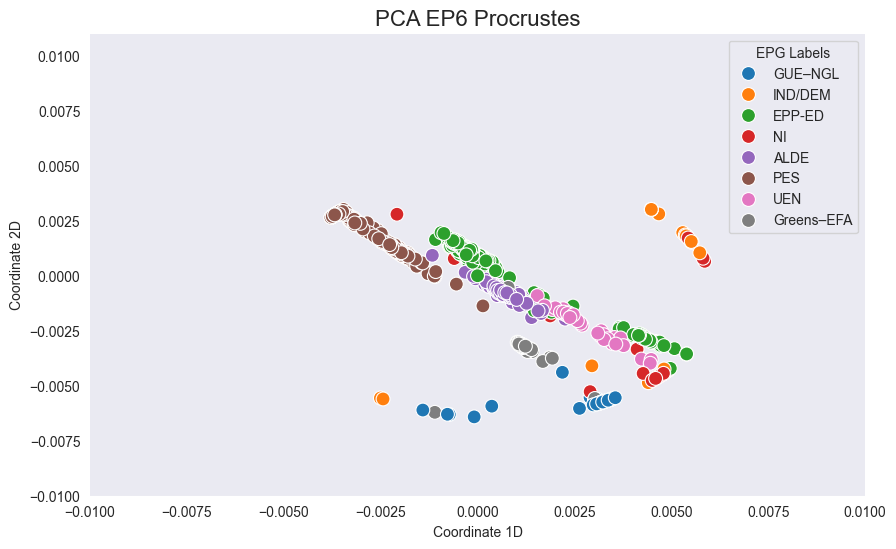

In [108]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=dfmtx2, x=0, y=1, hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-0.01, 0.01)
plt.ylim(-0.01, 0.011)
plt.title(f'PCA EP6 Procrustes', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

# Show the plot
plt.show()

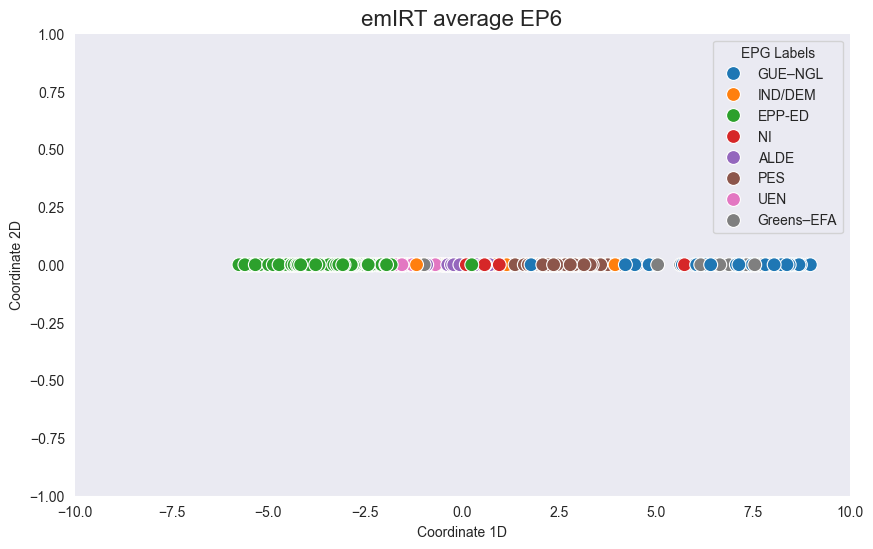

In [117]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=avg6, x="Average_position", y="y", hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-10, 10)
plt.ylim(-1, 1)
plt.title(f'emIRT average EP6', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

# Show the plot
plt.show()

In [119]:
avg6['y'] = 0
avg7['y'] = 0
avg8['y'] = 0
avg9['y'] = 0

In [121]:
avg7

,FullName,EPG_x,Average_position,MepId,Fname,Lname,Activ,Country,Party,EPG_y,Start,End,Birthday,Gender,y
0,Damien ABAD,EPP,2.253332,96850,Damien,Abad,no,France,Nouveau Centre,EPP,2009-07-14,2012-06-16,1980-04-05,MALE,0
1,János ÁDER,EPP,2.649164,96659,János,Áder,no,Hungary,Fidesz-Magyar Polgári Szövetség-Keresztény Demokrata Néppárt,EPP,2009-07-14,2012-05-09,1959-05-09,MALE,0
2,John Stuart AGNEW,EFD,2.936203,96897,John Stuart,Agnew,yes,United Kingdom,United Kingdom Independence Party,EFD,2009-07-14,2014-12-31,1949-08-30,MALE,0
3,Gabriele ALBERTINI,EPP,3.084280,28367,Gabriele,Albertini,no,Italy,Il Popolo della Libertà,EPP,2009-07-14,2013-03-14,1950-07-06,MALE,0
4,Jan Philipp ALBRECHT,Greens–EFA,-6.563521,96736,Jan Philipp,Albrecht,yes,Germany,Bündnis 90/Die Grünen,Greens–EFA,2009-07-14,2014-12-31,1982-12-20,MALE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Rina Ronja KARI,GUE–NGL,-3.197591,122885,Rina Ronja,Kari,no,Denmark,Folkebevægelsen mod EU,GUE–NGL,2014-02-05,2014-12-31,1985-02-15,FEMALE,0
849,Giovanni BARBAGALLO,S&D,-1.688300,123792,Giovanni,Barbagallo,no,Italy,Partito Democratico,S&D,2014-03-11,2014-12-31,1952-06-01,MALE,0
850,Annette KOEWIUS,EPP,1.948749,123816,Annette,Koewius,no,Germany,Christlich Demokratische Union Deutschlands,EPP,2014-03-12,2014-12-31,1945-09-22,FEMALE,0
851,Katrin SAKS,S&D,-1.331737,37200,Katrin,Saks,no,Estonia,Sotsiaaldemokraatlik Erakond,S&D,2014-04-07,2014-12-31,1956-11-29,FEMALE,0


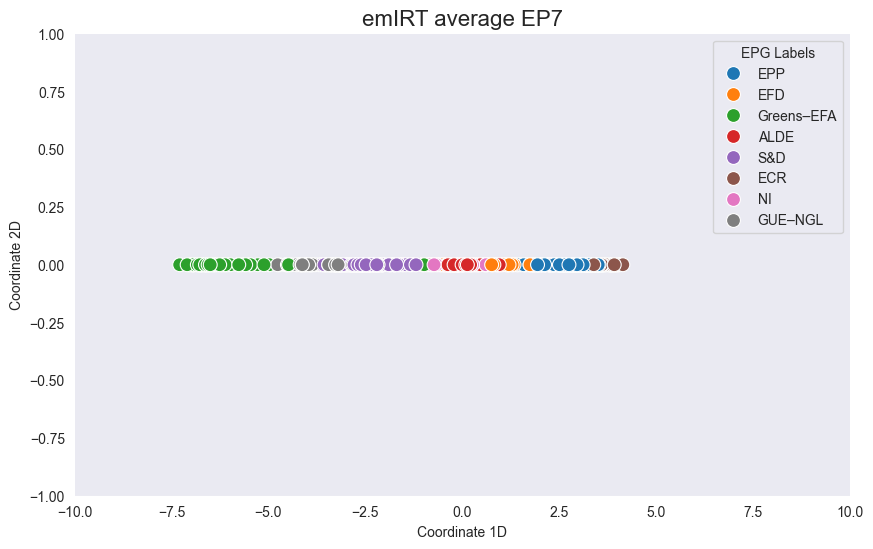

In [122]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=avg7, x="Average_position", y="y", hue='EPG_x', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-10, 10)
plt.ylim(-1, 1)
plt.title(f'emIRT average EP7', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

# Show the plot

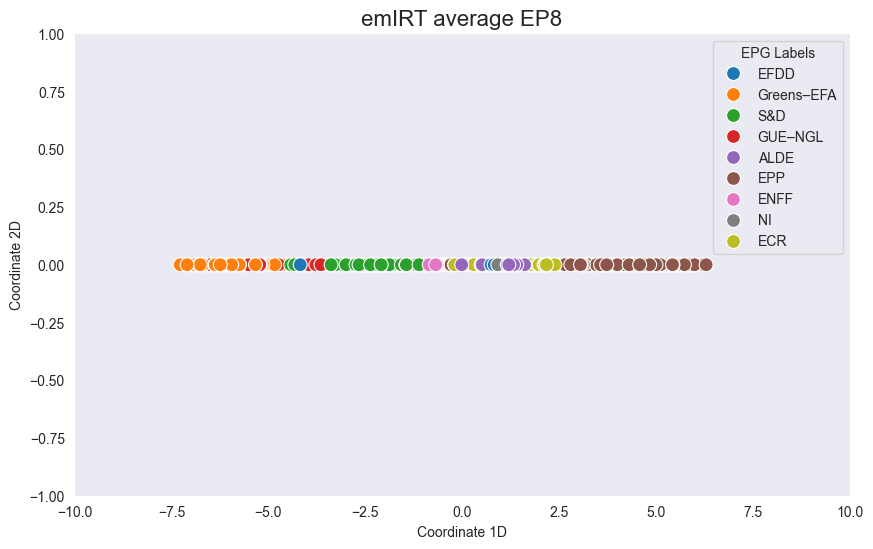

In [123]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=avg8, x="Average_position", y="y", hue='EPG_x', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-10, 10)
plt.ylim(-1, 1)
plt.title(f'emIRT average EP8', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)


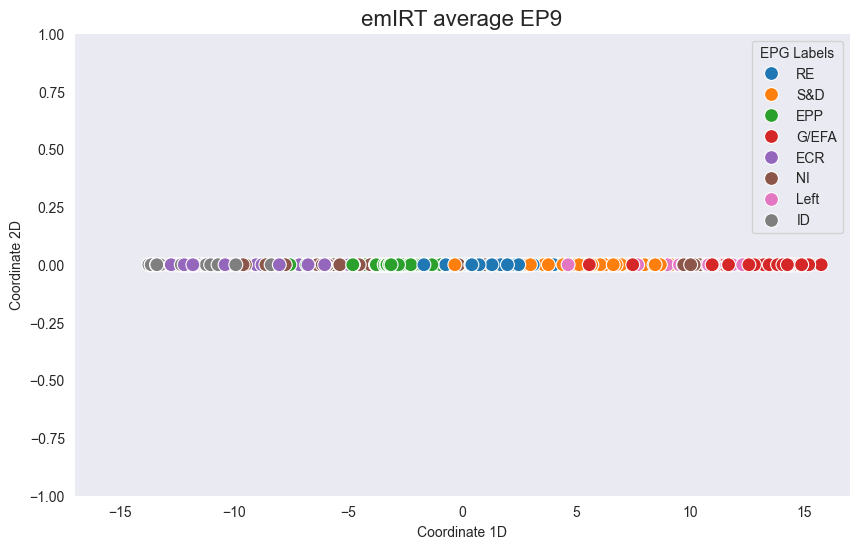

In [129]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=avg9, x="Average_position", y="y", hue='EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-17, 17)
plt.ylim(-1, 1)
plt.title(f'emIRT average EP9', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)


In [130]:
WNOMINATE1D = pd.read_csv(os.path.join("Results",'EP6_1D_Ideal_points_WNOMINATE.csv'))

In [132]:
WNOMINATE1D['y'] = 0

In [137]:
WNOMINATE1D['coord1D....result1d.legislators.coord1D'] = WNOMINATE1D['coord1D....result1d.legislators.coord1D']*-1

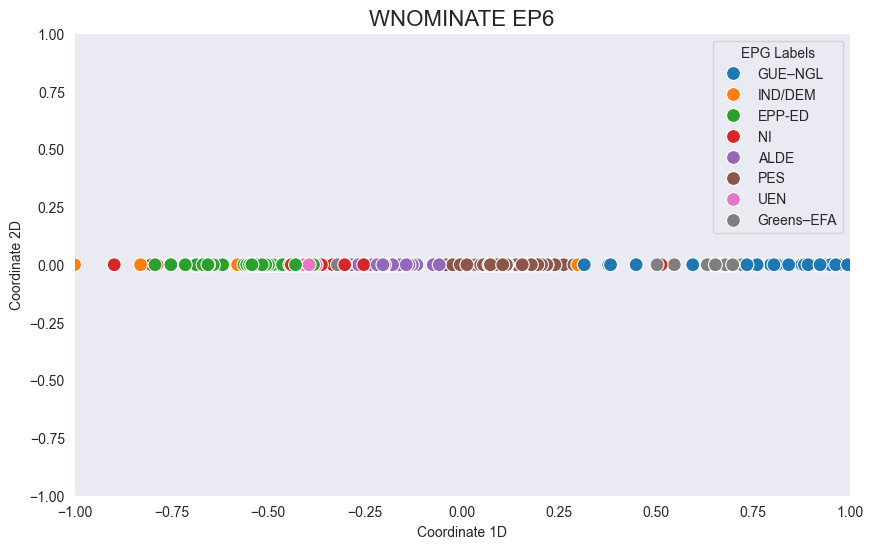

In [139]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=WNOMINATE1D, x="coord1D....result1d.legislators.coord1D", y="y", hue='EPG....mepsEP6.EPG', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'WNOMINATE EP6', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)


In [140]:
eigenstart7 = pd.read_csv(os.path.join("Results",'EP7','emIRT_EP7_eigenstarts.csv'))
eigenstart8 = pd.read_csv(os.path.join("Results",'EP8','emIRT_EP8_eigenstarts.csv'))
eigenstart9 = pd.read_csv(os.path.join("Results",'EP9','emIRT_EP9_eigenstarts.csv'))

In [141]:
eigenstart7

,MepId....names7,EPG....EPG7,d1,y
0,Damien ABAD,EPP,0.065917,0
1,János ÁDER,EPP,0.078064,0
2,John Stuart AGNEW,EFD,0.262885,0
3,Gabriele ALBERTINI,EPP,0.081228,0
4,Jan Philipp ALBRECHT,Greens–EFA,-0.324134,0
...,...,...,...,...
848,Rina Ronja KARI,GUE–NGL,-0.061410,0
849,Giovanni BARBAGALLO,S&D,-0.072549,0
850,Annette KOEWIUS,EPP,0.071819,0
851,Katrin SAKS,S&D,-0.058129,0


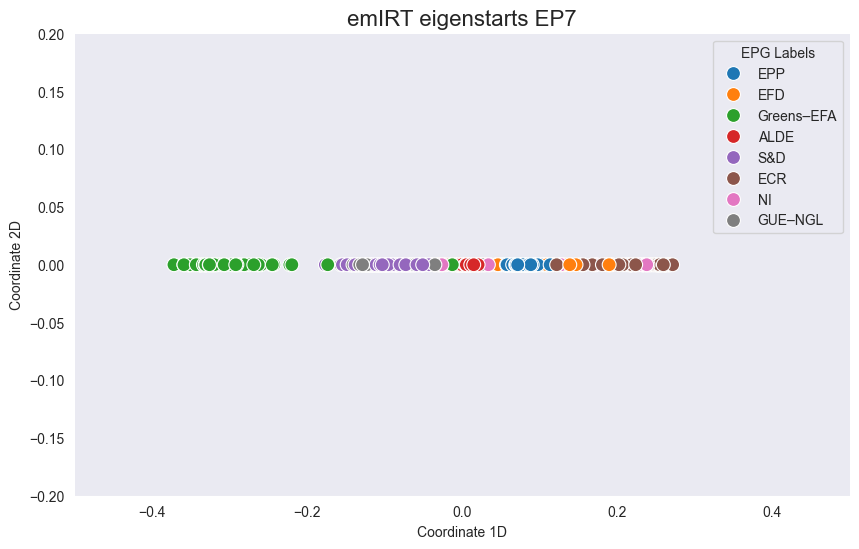

In [144]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=eigenstart7, x="d1", y="y", hue='EPG....EPG7', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-0.5, 0.5)
plt.ylim(-0.2, 0.2)
plt.title(f'emIRT eigenstarts EP7', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

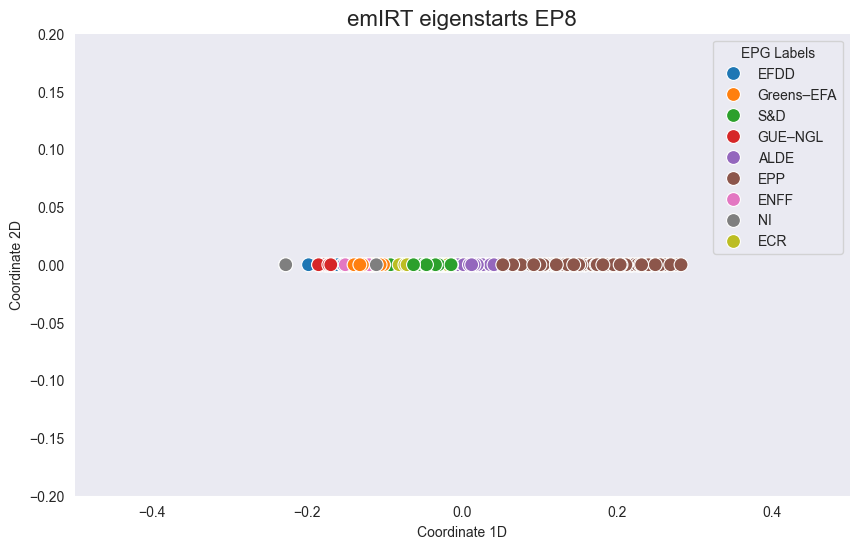

In [145]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=eigenstart8, x="d1", y="y", hue='EPG....EPG8', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-0.5, 0.5)
plt.ylim(-0.2, 0.2)
plt.title(f'emIRT eigenstarts EP8', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)

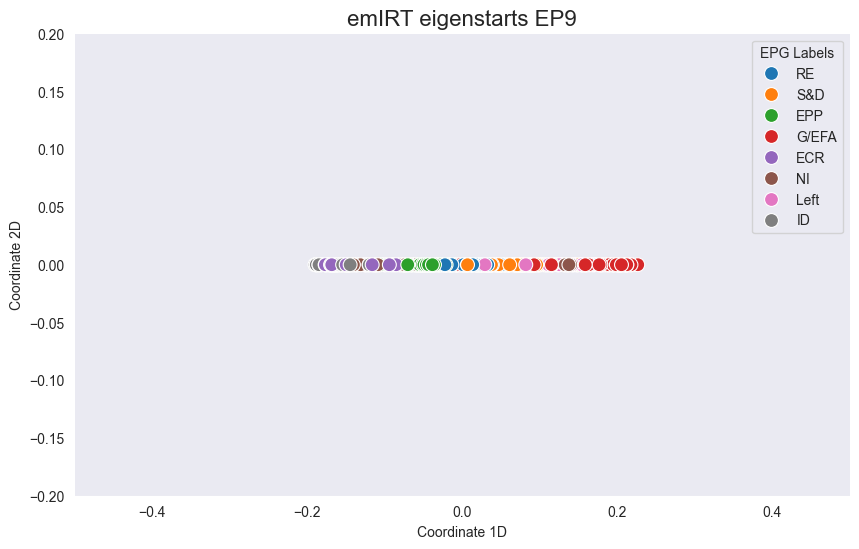

In [146]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with labels
p = sns.scatterplot(data=eigenstart9, x="d1", y="y", hue='EPG....EPG9', s=100)

# Add text labels to the points


# Set plot limits and labels
plt.xlim(-0.5, 0.5)
plt.ylim(-0.2, 0.2)
plt.title(f'emIRT eigenstarts EP9', fontsize=16)
plt.xlabel('Coordinate 1D')
plt.ylabel('Coordinate 2D')  # Empty ylabel as in the ggplot

# Remove y-axis elements



# Customize the legend
plt.legend(title='EPG Labels')

# Apply a minimal theme
sns.despine(left=True)
plt.grid(False)